In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

from scipy import stats

In [23]:
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

In [24]:
PATH = '/Users/galina.ryazanskaya/Downloads/thesis?/code?/'

## merge data with psychosocial data

In [25]:
df = pd.read_csv(PATH +'rus_merged_psychosocial_data.csv', index_col=0)
df = df[df.index.notnull()]

In [26]:
res_df = pd.read_csv(PATH + 'processed_values/ru_both.tsv', sep='\t', index_col=0, header=[0, 1, 2])

In [27]:
dfi = [i.replace('-', '').replace('S', 'PD1') for i in df.index]
df.index = dfi
# res_df.index = [i.replace('S', 'PD1') for i in res_df.index]
rdfi = [i.split('_')[0].replace('S', 'PD1') for i in res_df.index]

missing_psy = set(rdfi).difference(set(dfi))
len(missing_psy)

7

In [28]:
missing_psy = [i for i in res_df.index if i.split('_')[0] in missing_psy]
res_df.drop(missing_psy, inplace=True)

In [29]:
missing_text = set(dfi).difference(set(rdfi))
len(missing_text)

0

In [30]:
df.drop(missing_text, inplace=True)

In [31]:
non_start_timepoint = [i for i in res_df.index if i.split('_')[-1] != '1']
res_df.drop(non_start_timepoint, inplace=True)

In [32]:
res_df.loc['PD101_1'].dropna()

TASK                               
adventure  LM         m_bert_cgcoh      0.954746
                      m_bert_gcoh       0.942201
                      m_bert_lcoh       0.873049
                      m_bert_scoh       0.865214
                      m_cgcoh           0.930773
                                         ...    
sportsman  syntactic  max_sent_len     20.000000
                      mean_sent_len     8.500000
                      min_sent_len      2.000000
                      n_sents          12.000000
                      std_sent_len      4.425306
Name: PD101_1, Length: 156, dtype: float64

In [33]:
rdfi_filtered = [i.split('_')[0].replace('S', 'PD1') for i in res_df.index]
res_df.index = rdfi_filtered

## select target cols

In [36]:
df.columns

Index(['age', 'dep.scale', 'dep.severity-1', 'group.code', 'diagnosis.group',
       'diagnosis.type', 'diagnosis_code', 'diagnosis_eng', 'diagnosis_rus',
       'education.level.code', 'education.level.eng', 'education.years',
       'exacerbation', 'HDRS-17.score-1', 'longitudinal', 'panss-1-td',
       'panss-1-total', 'panss-n-1-total', 'panss-o-1-total',
       'panss-p-1-total', 'rehospitalization', 'sans-1-total',
       'saps-ftd-1-total', 'sex', 'sops-1-total', 'sops-c-total',
       'sops-d-total', 'sops-n-total', 'sops-p-total', 'td.scales',
       'td.severity'],
      dtype='object')

In [34]:
len(df)

183

In [50]:
df['diagnosis.group'].value_counts()

control    127
patient     56
Name: diagnosis.group, dtype: int64

In [51]:
df['diagnosis.type'].value_counts()

sz     31
dep    25
Name: diagnosis.type, dtype: int64

In [52]:
df['dep.scale'].value_counts()

HDRS    58
QIDS    39
Name: dep.scale, dtype: int64

In [54]:
df['td.scales'].value_counts()

SCL-90-R    39
SAPS        28
PANSS       28
Name: td.scales, dtype: int64

In [55]:
df['diagnosis_eng'].value_counts()

schizophrenia                                        20
borderline.personality.disorder                      10
schizoaffective.disorder                              8
bipolar.affective.disorder                            6
bipolar.affective.disorder.severe                     2
schizotypal.disorder                                  2
bipolar.affective.disorder.severe.psychotic           2
recurrent.depressive.disorder                         2
depressive.episode.moderate                           1
recurrent.depressive.disorder.severe.psychotic        1
schizotypal.disorder.pseudoneurotic.schizophrenia     1
personality.disorder                                  1
Name: diagnosis_eng, dtype: int64

In [59]:
df['diagnosis_code'].value_counts()

F20       20
F60.31    10
F25        8
F31        6
F31.4      2
F21        2
F31.5      2
F33        2
F32.1      1
F33.3      1
F21.3      1
F60        1
Name: diagnosis_code, dtype: int64

In [35]:
target_cols = ['sex', 'age', 'education.years', 
               'diagnosis.group', 'diagnosis.type',
               'td.severity', 'dep.severity']

In [61]:
panss_cols = [col for col in df.columns if col.startswith('panss')]
sans_cols = [col for col in df.columns if col.startswith('sans')]
saps_cols = [col for col in df.columns if col.startswith('saps')]
sops_cols = [col for col in df.columns if col.startswith('sops')]

In [62]:
df[df['diagnosis.type'] == 'sz'].count()

age                     31
dep.scale               31
dep.severity-1          31
group.code               3
diagnosis.group         31
diagnosis.type          31
diagnosis_code          31
diagnosis_eng           31
diagnosis_rus            3
education.level.code     3
education.level.eng     31
education.years         31
exacerbation             3
HDRS-17.score-1         21
longitudinal             3
panss-1-td              29
panss-1-total           29
panss-n-1-total         29
panss-o-1-total         29
panss-p-1-total         29
rehospitalization        3
sans-1-total             3
saps-ftd-1-total         3
sex                     31
sops-1-total             0
sops-c-total             1
sops-d-total             1
sops-n-total             1
sops-p-total             1
td.scales               31
td.severity             31
dtype: int64

In [40]:
df[df['diagnosis.group'] == 'patient'].count()

age                     56
dep.scale               56
dep.severity-1          56
group.code              28
diagnosis.group         56
diagnosis.type          56
diagnosis_code          56
diagnosis_eng           56
diagnosis_rus           28
education.level.code    28
education.level.eng     56
education.years         56
exacerbation            26
HDRS-17.score-1         46
longitudinal            21
panss-1-td              48
panss-1-total           49
panss-n-1-total         49
panss-o-1-total         49
panss-p-1-total         49
rehospitalization       26
sans-1-total            27
saps-ftd-1-total        28
sex                     56
sops-1-total             0
sops-c-total            16
sops-d-total            16
sops-n-total            16
sops-p-total            16
td.scales               56
td.severity             56
dtype: int64

In [41]:
df[df['diagnosis.group'] == 'control'].count()

age                     126
dep.scale                41
dep.severity-1           41
group.code                0
diagnosis.group         127
diagnosis.type            0
diagnosis_code            0
diagnosis_eng             0
diagnosis_rus             0
education.level.code      0
education.level.eng     125
education.years         126
exacerbation              0
HDRS-17.score-1          22
longitudinal              0
panss-1-td               22
panss-1-total            22
panss-n-1-total          22
panss-o-1-total          22
panss-p-1-total          22
rehospitalization         0
sans-1-total              0
saps-ftd-1-total          0
sex                     127
sops-1-total              0
sops-c-total              0
sops-d-total              0
sops-n-total              0
sops-p-total              0
td.scales                39
td.severity              41
dtype: int64

In [39]:
df.dropna(axis=0, thresh=30).iloc[0]

age                                      18.0
dep.scale                                HDRS
dep.severity-1                            1.0
group.code                                2.0
diagnosis.group                       patient
diagnosis.type                             sz
diagnosis_code                            F21
diagnosis_eng            schizotypal.disorder
diagnosis_rus                  Шизотипическое
education.level.code                      1.0
education.level.eng     vocational.unfinished
education.years                          11.0
exacerbation                              1.0
HDRS-17.score-1                           9.0
longitudinal                              1.0
panss-1-td                                4.0
panss-1-total                            39.0
panss-n-1-total                           9.0
panss-o-1-total                          23.0
panss-p-1-total                           7.0
rehospitalization                         0.0
sans-1-total                      

## features of raw texts

In [18]:
raw = pd.read_csv('/Users/galina.ryazanskaya/Downloads/thesis?/code?/rus_transcript_lex_by_task_with_dots.tsv', sep='\t', index_col=0)

In [19]:
raw.isna().sum(axis=0).sum()

1098

<AxesSubplot: >

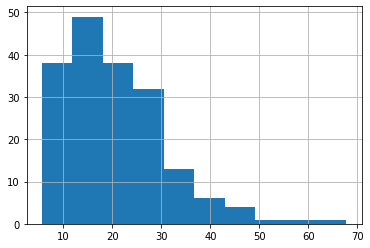

In [20]:
raw.applymap(lambda x: len(x.split('.')) if not pd.isna(x) else np.nan).mean(axis=1).hist()